In [5]:
import pandas as pd  # arrage  a DataFrame
import matplotlib.pyplot as plt # calucate mathimatics
import numpy as np # create a chart
import os # manage file and folder

In [6]:
df = pd.read_csv("/kaggle/input/coca-cola/Download Data - coca cola.csv")

In [7]:
df  # display database

,Date,Open,High,Low,Close,Volume
0,8/1/2025,68.60,69.04,68.27,68.86,"16,107,510"
1,07/31/2025,68.15,68.65,67.74,67.89,"17,193,420"
2,07/30/2025,69.11,69.33,68.53,68.75,"10,448,180"
3,07/29/2025,68.34,69.42,68.15,69.38,"16,223,380"
4,07/28/2025,68.74,68.90,68.06,68.09,"13,668,800"
...,...,...,...,...,...,...
1002,8/7/2020,47.47,48.08,47.21,47.80,"11,669,710"
1003,8/6/2020,46.66,47.53,46.60,47.48,"10,745,030"
1004,8/5/2020,46.90,47.27,46.81,47.22,"10,561,640"
1005,8/4/2020,46.29,46.86,46.22,46.69,"11,707,040"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1007 non-null   object 
 1   Open    1007 non-null   float64
 2   High    1007 non-null   float64
 3   Low     1007 non-null   float64
 4   Close   1007 non-null   float64
 5   Volume  1007 non-null   object 
dtypes: float64(4), object(2)
memory usage: 47.3+ KB


In [9]:
df.describe()

,Open,High,Low,Close
count,1007.000000,1007.000000,1007.000000,1007.000000
mean,60.367656,60.769265,59.932612,60.359970
std,6.481085,6.517323,6.437200,6.499686
min,46.290000,46.860000,46.220000,46.300000
25%,55.470000,55.965000,55.090000,55.480000
50%,60.480000,60.840000,60.110000,60.500000
75%,63.660000,64.060000,63.275000,63.740000
max,73.380000,74.380000,72.920000,73.900000


In [10]:
df[df.isnull().any(axis=1)]  # check database to find 'NULL' in column

,Date,Open,High,Low,Close,Volume


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # setting type of date 

In [12]:
print(df['Date'].head())

0   2025-08-01
1   2025-07-31
2   2025-07-30
3   2025-07-29
4   2025-07-28
Name: Date, dtype: datetime64[ns]


In [13]:
df.set_index('Date', inplace=True)  # Setting date to be index
df.sort_index(inplace=True)  # ordering date 

In [14]:
df['Daily_Return'] = df['Close'].pct_change()  # calculate Annual Percentage(%) Change.
df.dropna(subset=['Daily_Return'], inplace=True)  # delete 'NAN' after calculated 'Daily_Return'

In [15]:
trading_days_per_year = 252  # amount for sell-buy in year. depending with you
annualized_return = (1 + df['Daily_Return'].mean()) ** trading_days_per_year - 1  # calulate annualized return from AR = (1+r(daily)**trading day)-1 
                                                                                    

In [16]:
print(f"\n--- Results for Annual Percentage Change ---")
print(f"Annual Percentage Change (Annualized Return): {annualized_return:.2%}")


--- Results for Annual Percentage Change ---
Annual Percentage Change (Annualized Return): 12.12%


In [17]:
daily_volatility = df['Daily_Return'].std() # calulate standard deviation
annualized_volatility = daily_volatility * np.sqrt(trading_days_per_year) # calulate annualized volatility

In [18]:
print(f"\n--- Results for Volatility ---")
print(f"Daily Volatility (Standard Deviation of Daily Returns): {daily_volatility:.2%}")
print(f"Annualized Volatility (Standard Deviation of Annualized Returns): {annualized_volatility:.2%}")



--- Results for Volatility ---
Daily Volatility (Standard Deviation of Daily Returns): 1.10%
Annualized Volatility (Standard Deviation of Annualized Returns): 17.43%


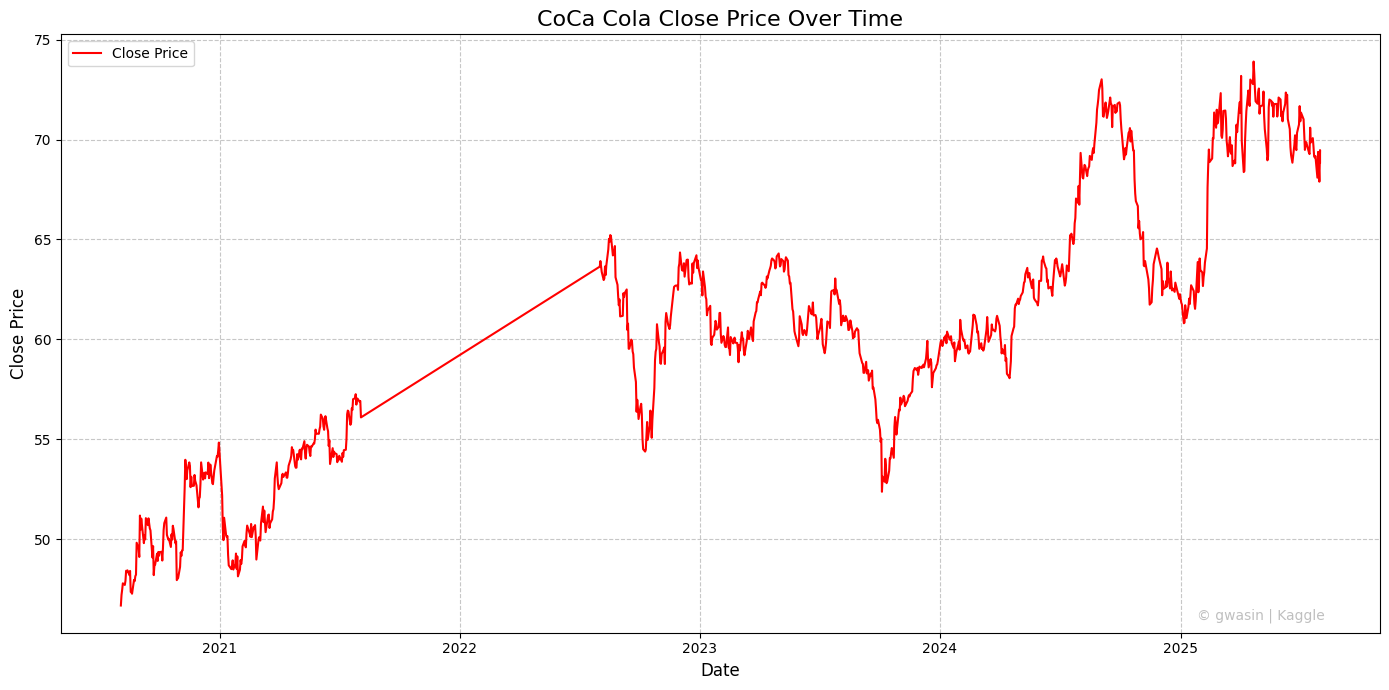

In [27]:
plt.figure(figsize=(14, 7)) # specify size of a line chart
plt.plot(df.index, df['Close'], label='Close Price', color='red') # ploting close price
plt.title('CoCa Cola Close Price Over Time', fontsize=16) # create name of line chart
plt.xlabel('Date', fontsize=12) # setting x axis
plt.ylabel('Close Price', fontsize=12) # setting y axis
plt.legend() # show title
plt.grid(True, linestyle='--', alpha=0.7) # add grid line
plt.text(
    0.91, 0.04,
    '© gwasin | Kaggle',
    fontsize=10,
    color='gray',
    ha='center',
    va='top',
    transform=plt.gca().transAxes,
    alpha=0.5 
)
plt.tight_layout() # setting layout
plt.show() # show line chart